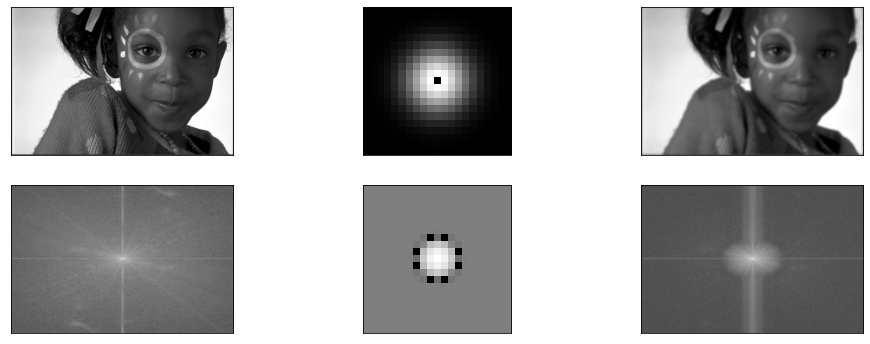

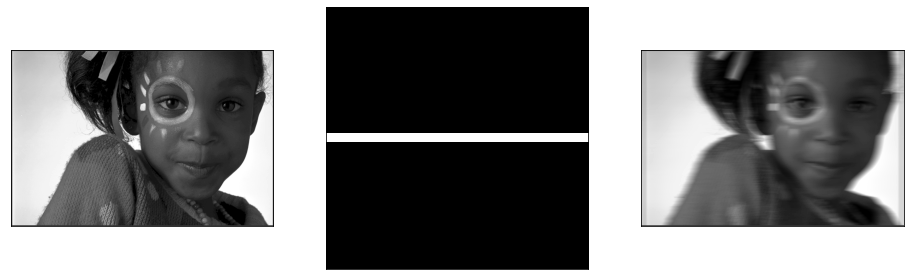

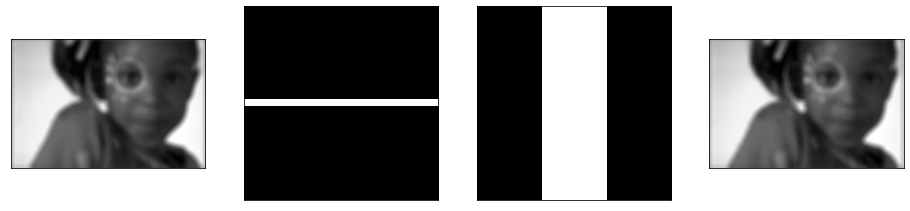

In [27]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy
import math

def identity_psf(sigma, ksize):
    khalf = int(ksize/2)
    kernel1d = numpy.empty((ksize,1), float)
    for i in range(ksize):
        kernel1d[i,0] = numpy.array(get_gauss_function_value(i,sigma,ksize))
        
    kernel2d = kernel1d*kernel1d.T
    kernel2d[khalf,khalf] = 0
    
    return kernel2d

def get_gauss_function_value(value, sigma,ksize):
    x = (value - (ksize-1)/2)**2
    return 1/(2*math.pi*sigma**2)**(1/2)* math.exp( - x/ (2*sigma**2) )
    
def show_in_fourier_spectrum( axis, image ):
    image = numpy.fft.fft2( image )
    image = numpy.fft.fftshift(image)
    magnitude_spectrum = numpy.log(numpy.abs(image))
    axis.imshow( magnitude_spectrum, cmap='gray')
    
def apply_filter( kernel, output_filename ):
    image = cv2.imread('images/kodim15.png', cv2.IMREAD_GRAYSCALE)

    fig, ax = plt.subplots(2, 3, figsize=(16,6))
    for i in range(2):
        for j in range(3):
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
    
    ax[0,0].imshow(image/255, cmap='gray')
    folded = cv2.filter2D( src=image, ddepth=-1, kernel=kernel)
    ax[0,1].imshow(kernel/255, cmap='gray')
    ax[0,2].imshow(folded/255, cmap='gray')
    
    cv2.imwrite(output_filename, folded)    

    show_in_fourier_spectrum(ax[1,0], image )
    show_in_fourier_spectrum(ax[1,1], kernel )
    show_in_fourier_spectrum(ax[1,2], folded )
    
    plt.show()

    
def get_horizontal_blur_kernel(ksize):
    kernel_h = numpy.zeros((ksize, ksize))
    kernel_h[int((ksize - 1)/2), :] = numpy.ones(ksize)
    kernel_h /= ksize
    return kernel_h
    


def get_vertical_blur_kernel(ksize):
    kernel_v = numpy.zeros((ksize, ksize))
    kernel_v[:,int((ksize - 1)/2)] = numpy.ones(ksize)
    kernel_v /= ksize
    return kernel_v
    
def get_combined_blur_kernel(ksize):
    kernel = numpy.zeros((ksize, ksize))
    kernel[:,int((ksize - 1)/2)] = numpy.ones(ksize)
    kernel[int((ksize - 1)/2), :] = numpy.ones(ksize)
    kernel /= ksize
    return kernel

def apply_filter_simple( kernel, output_filename ):
    image = cv2.imread('images/kodim15.png', cv2.IMREAD_GRAYSCALE)
    fig, ax = plt.subplots(1, 3, figsize=(16,6))
    for i in range(3):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    
    ax[0].imshow(image/255, cmap='gray')
    folded = cv2.filter2D(image, -1, kernel) 
    ax[1].imshow(kernel/255, cmap='gray')
    ax[2].imshow(folded/255, cmap='gray')
    
    cv2.imwrite(output_filename, folded)

def apply_filter_simple2( kernel1, kernel2, output_filename ):
    image = cv2.imread('kodim15_c.png', cv2.IMREAD_GRAYSCALE)
    fig, ax = plt.subplots(1, 4, figsize=(16,6))
    for i in range(4):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    
    ax[0].imshow(image/255, cmap='gray')
    folded = cv2.filter2D(image, -1, kernel1)
    folded = cv2.filter2D(image, -1, kernel2)
    ax[1].imshow(kernel1/255, cmap='gray')
    ax[2].imshow(kernel2/255, cmap='gray')
    ax[3].imshow(folded/255, cmap='gray')
    
    cv2.imwrite(output_filename, folded)
    
def get_boxfilter_kernel(ksize):
    kernel = numpy.ones((ksize, ksize))
    kernel[:,:] = 1/(2*ksize+1)*kernel[:,:]
    kernel[int(ksize/2),int(ksize/2)] = 0
    return kernel

kernel2d = identity_psf(3,21)
apply_filter( kernel2d, "kodim15_a_result.png" )

kernel_horizontal = get_horizontal_blur_kernel(31)
apply_filter_simple( kernel_horizontal, "kodim15_b_result.png" )

kernel_horizontal = get_horizontal_blur_kernel(31)
kernel_vertical = get_vertical_blur_kernel(3)
kernel_combined = get_combined_blur_kernel(31)
apply_filter_simple2( kernel_horizontal, kernel_vertical, "kodim15_c_result.png" )
#apply_filter_simple( kernel_combined, "kodim15_c_result.png" )

In [114]:
kernel1d = cv2.getGaussianKernel( ksize=40, sigma=3 ) 
kernel2d = kernel1d*kernel1d.T

[[8.89852205e-11]
 [7.34787547e-10]
 [5.42938640e-09]
 [3.58992001e-08]
 [2.12404567e-07]
 [1.12457387e-06]
 [5.32791370e-06]
 [2.25876700e-05]
 [8.56901184e-05]
 [2.90894232e-04]
 [8.83658651e-04]
 [2.40203325e-03]
 [5.84276683e-03]
 [1.27175412e-02]
 [2.47703879e-02]
 [4.31725319e-02]
 [6.73328952e-02]
 [9.39706251e-02]
 [1.17355109e-01]
 [1.31146572e-01]
 [1.31146572e-01]
 [1.17355109e-01]
 [9.39706251e-02]
 [6.73328952e-02]
 [4.31725319e-02]
 [2.47703879e-02]
 [1.27175412e-02]
 [5.84276683e-03]
 [2.40203325e-03]
 [8.83658651e-04]
 [2.90894232e-04]
 [8.56901184e-05]
 [2.25876700e-05]
 [5.32791370e-06]
 [1.12457387e-06]
 [2.12404567e-07]
 [3.58992001e-08]
 [5.42938640e-09]
 [7.34787547e-10]
 [8.89852205e-11]]
